In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import krippendorff
import os
import pickle


# Import my helper functions
from mentat.config import config_params
from mentat.pipeline import helper_functions, preference_tools, bootstrap_tools, plot_results, create_dataset

# Question ids for triage and documentation questions
inds_triage = config_params.inds_triage
inds_documentation = config_params.inds_documentation
# Color rubric for question categories for consistent plots
cols = config_params.cols

%load_ext autoreload
%autoreload 2

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
question_dataset = create_dataset.import_raw_questions(os.getcwd(), "questions_final.csv")

#Raw questions: 207, #Categories 5
Categories:  ['diagnosis' 'documentation' 'monitoring' 'treatment' 'triage']
	diagnosis: 		#50 questions (#48 moddable)
	documentation: 		#33 questions (#10 moddable)
	monitoring: 		#49 questions (#41 moddable)
	treatment: 		#47 questions (#44 moddable)
	triage: 		#28 questions (#28 moddable)


Minimum number of answers: 4.0; Mean: 9.836065573770492
(600, 13)


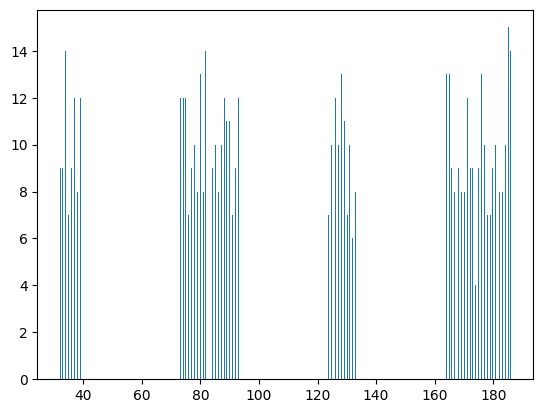

In [3]:
# Data Import
directory = './annotated_data/'
# directory = './test_annotated_data_simple/'

raw_data = helper_functions.import_raw_annotations(directory)
helper_functions.annotation_data_check(raw_data)
print(raw_data.shape)

# Processing data
processed_data = helper_functions.process_raw_data_annotations(raw_data)
response_data, annotator_individual_data = processed_data
# Add random annotation as baseline
annotator_individual_data["random"] = np.random.randint(0, 100, [100, 5])

# Get question type-filtered data; discard anntoator individual colleciton
processed_data_typed = [
    helper_functions.process_raw_data_annotations(raw_data, q_key)[0] 
    for q_key in ["q_male", "q_female", "q_they"]
]

In [ ]:
print(response_data.shape)
for q_id in np.unique(response_data["q_no"]):
    
    creator_truth = question_dataset[question_dataset["q_id"] == q_id]["creator_truth"].item()
    creator_truth = [int(x) * 100 for x in creator_truth]
    response_data.loc[len(response_data)] = [int(q_id), 'crtr', creator_truth, "creator"]
    
print(response_data.shape)

(600, 4)
(661, 4)


In [6]:
int(response_data.loc[0, "q_no"])

90

In [8]:
response_data[response_data["q_no"] == 32]
# print(response_data[response_data["rater_id"] == "djg"].sort_values('q_no').to_string())

q_no rater_id             response     q_key
93     32       al    [84, 0, 0, 24, 0]    q_male
191    32      cew   [0, 100, 22, 0, 0]    q_male
210    32      cew    [0, 100, 0, 0, 0]    q_they
245    32       sg   [100, 0, 0, 0, 11]  q_female
381    32      djg  [0, 100, 14, 13, 0]    q_male
405    32       nv    [45, 2, 3, 91, 2]  q_female
482    32      knk   [100, 75, 0, 0, 0]  q_female
536    32      djg   [0, 0, 100, 25, 0]  q_female
552    32      djg   [91, 22, 0, 0, 25]    q_they
600    32     crtr    [0, 100, 0, 0, 0]   creator

In [ ]:
# object_to_save = [hbt_scores, hbt_scores_params, bt_scores, bt_scores_typed, means_and_alphas]

# # Saving objects to a file
# with open('analysis_results_jan20.pkl', 'wb') as f:  # 'wb' for write binary
#     pickle.dump(object_to_save, f)

# # Loading objects from a file
# with open('analysis_results.pkl', 'rb') as f:  # 'rb' for read binary
#     loaded_object = pickle.load(f)
# hbt_scores, hbt_scores_params, bt_scores, bt_scores_typed, means_and_alphas = loaded_object 


In [12]:
hbt_scores, hbt_scores_params = helper_functions.calc_hbt_preference_probs(response_data)
# hbtl;_scores, hbt_scores_params

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 507.78635817318957
            Iterations: 65
            Function evaluations: 21082
            Gradient evaluations: 65
Rater parameters:
al
{'slope': np.float64(0.5000000000002346), 'offset': np.float64(2.9999999999998717)}
cew
{'slope': np.float64(1.1570850044724177), 'offset': np.float64(1.7132129117676955)}
crtr
{'slope': np.float64(1.6761566573879694), 'offset': np.float64(1.4566397731416596)}
djg
{'slope': np.float64(0.5000000000002068), 'offset': np.float64(2.999999999999787)}
knk
{'slope': np.float64(1.4222680921323572), 'offset': np.float64(1.8478722906081064)}
mr
{'slope': np.float64(0.9989963978632465), 'offset': np.float64(2.221428983615263)}
ms
{'slope': np.float64(1.1187476660097675), 'offset': np.float64(1.6225627410435746)}
nv
{'slope': np.float64(0.5), 'offset': np.float64(2.7936084824474086)}
sg
{'slope': np.float64(0.5000000000001835), 'offset': np.float64(3.0)}
Betas for que

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 492.27202280917106
            Iterations: 90
            Function evaluations: 29198
            Gradient evaluations: 90
Rater parameters:
al
{'slope': np.float64(0.5), 'offset': np.float64(3.0)}
cew
{'slope': np.float64(1.2684496057759507), 'offset': np.float64(1.5439512333380583)}
crtr
{'slope': np.float64(1.5991656723317742), 'offset': np.float64(1.3619670698967437)}
djg
{'slope': np.float64(0.5), 'offset': np.float64(3.0)}
knk
{'slope': np.float64(1.4205515813729301), 'offset': np.float64(1.8428826122339619)}
mr
{'slope': np.float64(1.0106811556338438), 'offset': np.float64(1.9433900544407734)}
ms
{'slope': np.float64(1.2224517646266533), 'offset': np.float64(1.4031080623298084)}
nv
{'slope': np.float64(0.5000000000005218), 'offset': np.float64(2.886804021541995)}
sg
{'slope': np.float64(0.5), 'offset': np.float64(3.0)}
Betas for question 32: [-0.7941744   1.4994349   0.69550866 -0.37805718 

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 472.47279747962887
            Iterations: 80
            Function evaluations: 25952
            Gradient evaluations: 80
Rater parameters:
al
{'slope': np.float64(0.5000000000007943), 'offset': np.float64(2.9999999999995306)}
cew
{'slope': np.float64(1.2952218861942448), 'offset': np.float64(1.2216094094917969)}
crtr
{'slope': np.float64(1.671294469274651), 'offset': np.float64(1.2489450566504379)}
djg
{'slope': np.float64(0.5000000000018557), 'offset': np.float64(2.9999999999986895)}
knk
{'slope': np.float64(1.484544208194032), 'offset': np.float64(1.542124533738961)}
mr
{'slope': np.float64(1.046441761990922), 'offset': np.float64(2.039510960226967)}
ms
{'slope': np.float64(1.1123639203637443), 'offset': np.float64(1.68689715362723)}
nv
{'slope': np.float64(0.5051590863827138), 'offset': np.float64(2.8140640921436773)}
sg
{'slope': np.float64(0.500000000000869), 'offset': np.float64(2.99999999

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 473.6234849176683
            Iterations: 84
            Function evaluations: 27261
            Gradient evaluations: 84
Rater parameters:
al
{'slope': np.float64(0.5000000000000604), 'offset': np.float64(3.0)}
cew
{'slope': np.float64(0.743133453154442), 'offset': np.float64(1.7769448781027686)}
crtr
{'slope': np.float64(1.6521608080920511), 'offset': np.float64(1.2801233289116705)}
djg
{'slope': np.float64(0.5000000000001273), 'offset': np.float64(2.999999999999909)}
knk
{'slope': np.float64(1.5582952805585881), 'offset': np.float64(1.5637808046435564)}
mr
{'slope': np.float64(1.0956893907052236), 'offset': np.float64(2.102057432556987)}
ms
{'slope': np.float64(1.517191756408244), 'offset': np.float64(1.095309399335733)}
nv
{'slope': np.float64(0.5283528240944256), 'offset': np.float64(2.5857023816072195)}
sg
{'slope': np.float64(0.5000000000000939), 'offset': np.float64(2.999999999999969)}
Bet

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 485.9138220703412
            Iterations: 86
            Function evaluations: 27893
            Gradient evaluations: 86
Rater parameters:
al
{'slope': np.float64(0.5000000000004762), 'offset': np.float64(2.999999999999483)}
cew
{'slope': np.float64(1.2961493341128656), 'offset': np.float64(1.4719803305090544)}
crtr
{'slope': np.float64(1.5701541451446754), 'offset': np.float64(1.5841433901097737)}
djg
{'slope': np.float64(0.5000000000005853), 'offset': np.float64(2.9999999999997558)}
knk
{'slope': np.float64(1.571872860091353), 'offset': np.float64(1.536890546579668)}
mr
{'slope': np.float64(1.2275425234320516), 'offset': np.float64(1.990892639938376)}
ms
{'slope': np.float64(1.0908639112431684), 'offset': np.float64(1.4536678603173385)}
nv
{'slope': np.float64(0.5000000000003265), 'offset': np.float64(2.8662234448127846)}
sg
{'slope': np.float64(0.5000000000007737), 'offset': np.float64(2.99999

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 468.6932005084085
            Iterations: 77
            Function evaluations: 24982
            Gradient evaluations: 77
Rater parameters:
al
{'slope': np.float64(0.5), 'offset': np.float64(3.0)}
cew
{'slope': np.float64(1.4072293388701875), 'offset': np.float64(1.2673371959838768)}
crtr
{'slope': np.float64(1.610537164158643), 'offset': np.float64(1.317415383000915)}
djg
{'slope': np.float64(0.5), 'offset': np.float64(3.0)}
knk
{'slope': np.float64(1.5016383273227754), 'offset': np.float64(1.6205506686284896)}
mr
{'slope': np.float64(0.9774826915168273), 'offset': np.float64(2.0411214985814428)}
ms
{'slope': np.float64(1.1760586134300108), 'offset': np.float64(1.5038713612446286)}
nv
{'slope': np.float64(0.5000000000001227), 'offset': np.float64(2.8143020645555823)}
sg
{'slope': np.float64(0.5000000000000965), 'offset': np.float64(2.9999999999998415)}
Betas for question 32: [ 0.59204885  0.86285

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 471.1491094018679
            Iterations: 85
            Function evaluations: 27578
            Gradient evaluations: 85
Rater parameters:
al
{'slope': np.float64(0.5000000000000071), 'offset': np.float64(2.999999999999999)}
cew
{'slope': np.float64(1.145803929709411), 'offset': np.float64(1.731154515670647)}
crtr
{'slope': np.float64(1.6186580814130105), 'offset': np.float64(1.0638735084384028)}
djg
{'slope': np.float64(0.5000000000000001), 'offset': np.float64(2.9999999999999973)}
knk
{'slope': np.float64(1.4008658269797098), 'offset': np.float64(1.6198446611831587)}
mr
{'slope': np.float64(1.0365394401672774), 'offset': np.float64(2.1437527248727855)}
ms
{'slope': np.float64(1.2597827404077455), 'offset': np.float64(1.517361347630092)}
nv
{'slope': np.float64(0.5000000000000028), 'offset': np.float64(2.885219251518845)}
sg
{'slope': np.float64(0.500000000000004), 'offset': np.float64(2.9827624

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 475.915239482584
            Iterations: 74
            Function evaluations: 24016
            Gradient evaluations: 74
Rater parameters:
al
{'slope': np.float64(0.5000000000011104), 'offset': np.float64(2.9999999999999227)}
cew
{'slope': np.float64(1.2739551991813312), 'offset': np.float64(1.5014809806063536)}
crtr
{'slope': np.float64(1.711832742328234), 'offset': np.float64(1.2447173798721065)}
djg
{'slope': np.float64(0.5000000000016785), 'offset': np.float64(2.9999999999984794)}
knk
{'slope': np.float64(1.4025240110624273), 'offset': np.float64(1.726957640902772)}
mr
{'slope': np.float64(0.7584469478810689), 'offset': np.float64(2.323462333200026)}
ms
{'slope': np.float64(1.3203337037816198), 'offset': np.float64(1.335525065705721)}
nv
{'slope': np.float64(0.8469070184445356), 'offset': np.float64(2.524512200387604)}
sg
{'slope': np.float64(0.5000000000010552), 'offset': np.float64(3.0)}
Bet

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 475.63211713654994
            Iterations: 77
            Function evaluations: 24989
            Gradient evaluations: 77
Rater parameters:
al
{'slope': np.float64(0.5000000000004144), 'offset': np.float64(2.9999999999997353)}
cew
{'slope': np.float64(1.514453683067853), 'offset': np.float64(1.3800453343045442)}
crtr
{'slope': np.float64(1.6615885284442766), 'offset': np.float64(1.408727340676838)}
djg
{'slope': np.float64(0.500000000000645), 'offset': np.float64(2.9999999999994857)}
knk
{'slope': np.float64(1.381392705945368), 'offset': np.float64(1.5870661624425912)}
mr
{'slope': np.float64(1.0892385559739526), 'offset': np.float64(2.0364678418718163)}
ms
{'slope': np.float64(1.048813469111089), 'offset': np.float64(1.4216747325074948)}
nv
{'slope': np.float64(0.5000000000003226), 'offset': np.float64(2.882845904188816)}
sg
{'slope': np.float64(0.5000000000003004), 'offset': np.float64(2.959199

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 463.9775460002991
            Iterations: 88
            Function evaluations: 28550
            Gradient evaluations: 88
Rater parameters:
al
{'slope': np.float64(0.5000000000026958), 'offset': np.float64(2.9999999999977147)}
cew
{'slope': np.float64(1.3851238878581842), 'offset': np.float64(1.3423409204483918)}
crtr
{'slope': np.float64(1.592455549872272), 'offset': np.float64(1.2682768877990058)}
djg
{'slope': np.float64(0.5000000000027649), 'offset': np.float64(2.9999999999973532)}
knk
{'slope': np.float64(1.4543355043717734), 'offset': np.float64(1.538108557521138)}
mr
{'slope': np.float64(1.2414519880092976), 'offset': np.float64(1.9532640261631353)}
ms
{'slope': np.float64(1.080364883912758), 'offset': np.float64(1.1919732991031655)}
nv
{'slope': np.float64(0.5), 'offset': np.float64(2.7690482850070874)}
sg
{'slope': np.float64(0.5), 'offset': np.float64(3.0)}
Betas for question 32: [ 0.289

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 484.4646324373365
            Iterations: 73
            Function evaluations: 23690
            Gradient evaluations: 73
Rater parameters:
al
{'slope': np.float64(0.5), 'offset': np.float64(3.0)}
cew
{'slope': np.float64(1.4750874993195737), 'offset': np.float64(1.1384551134471288)}
crtr
{'slope': np.float64(1.4853089134668125), 'offset': np.float64(1.6384498538157652)}
djg
{'slope': np.float64(0.5), 'offset': np.float64(3.0)}
knk
{'slope': np.float64(1.3613956580295312), 'offset': np.float64(1.7621915195752704)}
mr
{'slope': np.float64(1.1757173772788563), 'offset': np.float64(2.0717883622307323)}
ms
{'slope': np.float64(1.0796851307088533), 'offset': np.float64(1.6728882017433269)}
nv
{'slope': np.float64(0.7807577438366705), 'offset': np.float64(2.5606391499845436)}
sg
{'slope': np.float64(0.5), 'offset': np.float64(2.9999999999998845)}
Betas for question 32: [-0.29585203  1.23982558  0.531350

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 481.8420533503979
            Iterations: 71
            Function evaluations: 23040
            Gradient evaluations: 71
Rater parameters:
al
{'slope': np.float64(0.5000000000001018), 'offset': np.float64(3.0)}
cew
{'slope': np.float64(1.169691200424189), 'offset': np.float64(1.4787785127785964)}
crtr
{'slope': np.float64(1.6121255381603627), 'offset': np.float64(1.302389897100574)}
djg
{'slope': np.float64(0.500000000000132), 'offset': np.float64(2.9999999999998646)}
knk
{'slope': np.float64(1.5435071826271147), 'offset': np.float64(1.7467779062863937)}
mr
{'slope': np.float64(1.1377238912692182), 'offset': np.float64(2.047602397816)}
ms
{'slope': np.float64(0.9759893246765337), 'offset': np.float64(1.6937166668116195)}
nv
{'slope': np.float64(0.6234931859657994), 'offset': np.float64(2.65470371171006)}
sg
{'slope': np.float64(0.500000000000116), 'offset': np.float64(2.9999999999999587)}
Betas f

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 476.962689829964
            Iterations: 92
            Function evaluations: 29838
            Gradient evaluations: 92
Rater parameters:
al
{'slope': np.float64(0.5000000000009925), 'offset': np.float64(2.9999999999993965)}
cew
{'slope': np.float64(1.2542458289366187), 'offset': np.float64(1.4189014966828317)}
crtr
{'slope': np.float64(1.5201252247627468), 'offset': np.float64(1.4199493694102272)}
djg
{'slope': np.float64(0.5000000000007958), 'offset': np.float64(2.9999999999994964)}
knk
{'slope': np.float64(1.483972454047152), 'offset': np.float64(1.7656374908544927)}
mr
{'slope': np.float64(1.0705797039933589), 'offset': np.float64(2.051723528654807)}
ms
{'slope': np.float64(1.3485196786719276), 'offset': np.float64(1.4694010513806224)}
nv
{'slope': np.float64(0.8294052894518512), 'offset': np.float64(2.589057364012065)}
sg
{'slope': np.float64(0.5000000000008931), 'offset': np.float64(2.99999

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 464.1938602239186
            Iterations: 86
            Function evaluations: 27906
            Gradient evaluations: 86
Rater parameters:
al
{'slope': np.float64(0.5000000000001436), 'offset': np.float64(2.999999999999987)}
cew
{'slope': np.float64(1.4201136287210057), 'offset': np.float64(1.1939117333014784)}
crtr
{'slope': np.float64(1.469868316516595), 'offset': np.float64(1.2088896457112421)}
djg
{'slope': np.float64(0.5), 'offset': np.float64(3.0)}
knk
{'slope': np.float64(1.3863366563951753), 'offset': np.float64(1.8000338689487376)}
mr
{'slope': np.float64(0.5128232532961517), 'offset': np.float64(2.190526421914112)}
ms
{'slope': np.float64(1.5660651596420687), 'offset': np.float64(1.1422095122800546)}
nv
{'slope': np.float64(0.5), 'offset': np.float64(2.755758974065766)}
sg
{'slope': np.float64(0.5000000000000785), 'offset': np.float64(3.0)}
Betas for question 32: [ 16.89727592 -26.36824

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 481.8190562180317
            Iterations: 82
            Function evaluations: 26597
            Gradient evaluations: 82
Rater parameters:
al
{'slope': np.float64(0.5), 'offset': np.float64(3.0)}
cew
{'slope': np.float64(1.43407689691827), 'offset': np.float64(1.4490410755102725)}
crtr
{'slope': np.float64(1.624723168923563), 'offset': np.float64(1.3140301347090777)}
djg
{'slope': np.float64(0.5000000000001205), 'offset': np.float64(3.0)}
knk
{'slope': np.float64(1.4910922044352184), 'offset': np.float64(1.6315268821479643)}
mr
{'slope': np.float64(1.169195658074402), 'offset': np.float64(2.0317005866109783)}
ms
{'slope': np.float64(1.173146653133342), 'offset': np.float64(1.793094790123557)}
nv
{'slope': np.float64(0.5000000000002119), 'offset': np.float64(2.708534372577933)}
sg
{'slope': np.float64(0.5), 'offset': np.float64(2.8934262991335293)}
Betas for question 32: [-0.92821899  1.36525409  

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 476.2480633432057
            Iterations: 85
            Function evaluations: 27571
            Gradient evaluations: 85
Rater parameters:
al
{'slope': np.float64(0.5000000000002294), 'offset': np.float64(2.999999999999957)}
cew
{'slope': np.float64(1.4015370396461555), 'offset': np.float64(1.306370730519127)}
crtr
{'slope': np.float64(1.4773566015800952), 'offset': np.float64(1.489397887380045)}
djg
{'slope': np.float64(0.5000000000002208), 'offset': np.float64(2.9999999999998206)}
knk
{'slope': np.float64(1.350840469109551), 'offset': np.float64(1.6808923098511201)}
mr
{'slope': np.float64(1.1679440341711926), 'offset': np.float64(1.9489810159638201)}
ms
{'slope': np.float64(1.3929047406256727), 'offset': np.float64(1.5757669135627796)}
nv
{'slope': np.float64(0.5403203114256387), 'offset': np.float64(2.705960609700352)}
sg
{'slope': np.float64(0.5000000000001267), 'offset': np.float64(2.999999

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 469.2366255673725
            Iterations: 95
            Function evaluations: 30821
            Gradient evaluations: 95
Rater parameters:
al
{'slope': np.float64(0.5), 'offset': np.float64(3.0)}
cew
{'slope': np.float64(1.3701714786858885), 'offset': np.float64(1.490277895721976)}
crtr
{'slope': np.float64(1.7627045604482372), 'offset': np.float64(1.0587667476092333)}
djg
{'slope': np.float64(0.5), 'offset': np.float64(3.0)}
knk
{'slope': np.float64(1.1099328801245083), 'offset': np.float64(1.7862724366366194)}
mr
{'slope': np.float64(1.101371244929269), 'offset': np.float64(2.098520328350541)}
ms
{'slope': np.float64(1.4152871086295837), 'offset': np.float64(1.2733380481983476)}
nv
{'slope': np.float64(0.5000000000000133), 'offset': np.float64(2.814050738306734)}
sg
{'slope': np.float64(0.5), 'offset': np.float64(2.9999999999999987)}
Betas for question 32: [-0.389989    1.60195735  0.56680223 -

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 466.36762762747423
            Iterations: 82
            Function evaluations: 26597
            Gradient evaluations: 82
Rater parameters:
al
{'slope': np.float64(0.5000000000003866), 'offset': np.float64(2.9999999999999662)}
cew
{'slope': np.float64(0.9715290950028087), 'offset': np.float64(1.6915156829006468)}
crtr
{'slope': np.float64(1.7146644517322975), 'offset': np.float64(1.0349699123918037)}
djg
{'slope': np.float64(0.5000000000004655), 'offset': np.float64(2.9999999999996296)}
knk
{'slope': np.float64(1.6600210806478384), 'offset': np.float64(1.451278676756597)}
mr
{'slope': np.float64(1.1406698228941845), 'offset': np.float64(1.9901425793993546)}
ms
{'slope': np.float64(1.1161010426291218), 'offset': np.float64(1.4536829490044834)}
nv
{'slope': np.float64(0.5000000000001673), 'offset': np.float64(2.89039748003824)}
sg
{'slope': np.float64(0.5000000000001186), 'offset': np.float64(2.921

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 479.0390110362955
            Iterations: 76
            Function evaluations: 24664
            Gradient evaluations: 76
Rater parameters:
al
{'slope': np.float64(0.5000000000000705), 'offset': np.float64(2.9999999999999853)}
cew
{'slope': np.float64(1.0800588236906148), 'offset': np.float64(1.6260775298854047)}
crtr
{'slope': np.float64(1.5832584592330095), 'offset': np.float64(1.3975370135785592)}
djg
{'slope': np.float64(0.5000000000000007), 'offset': np.float64(2.99999999999991)}
knk
{'slope': np.float64(1.6051289312308499), 'offset': np.float64(1.5606836172483072)}
mr
{'slope': np.float64(1.2291633446615817), 'offset': np.float64(1.8921038524933134)}
ms
{'slope': np.float64(0.7110087118675396), 'offset': np.float64(1.9173074165819588)}
nv
{'slope': np.float64(0.5), 'offset': np.float64(2.6601091019955647)}
sg
{'slope': np.float64(0.5), 'offset': np.float64(3.0)}
Betas for question 32: [-0.96

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 474.55794606733696
            Iterations: 82
            Function evaluations: 26594
            Gradient evaluations: 82
Rater parameters:
al
{'slope': np.float64(0.500000000000597), 'offset': np.float64(2.9999999999993046)}
cew
{'slope': np.float64(1.364449461065173), 'offset': np.float64(1.354877465634553)}
crtr
{'slope': np.float64(1.5671611735034932), 'offset': np.float64(1.3240145480459231)}
djg
{'slope': np.float64(0.5), 'offset': np.float64(2.999999999999502)}
knk
{'slope': np.float64(1.4566703591943118), 'offset': np.float64(1.7183267335163375)}
mr
{'slope': np.float64(1.1893402409550329), 'offset': np.float64(1.8332727539387959)}
ms
{'slope': np.float64(1.366347850610243), 'offset': np.float64(1.2954489500749222)}
nv
{'slope': np.float64(0.5000000000004807), 'offset': np.float64(2.9186625174321854)}
sg
{'slope': np.float64(0.5000000000005116), 'offset': np.float64(3.0)}
Betas for questi

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 473.68780002736685
            Iterations: 79
            Function evaluations: 25632
            Gradient evaluations: 79
Rater parameters:
al
{'slope': np.float64(0.5), 'offset': np.float64(3.0)}
cew
{'slope': np.float64(1.3002809298820541), 'offset': np.float64(1.4016448638676697)}
crtr
{'slope': np.float64(1.759595746230584), 'offset': np.float64(1.154770281703518)}
djg
{'slope': np.float64(0.5), 'offset': np.float64(3.0)}
knk
{'slope': np.float64(1.4384835570680314), 'offset': np.float64(1.5433833778257906)}
mr
{'slope': np.float64(0.9664147989385345), 'offset': np.float64(2.153678329044452)}
ms
{'slope': np.float64(1.1024727527860394), 'offset': np.float64(1.6189623139120084)}
nv
{'slope': np.float64(0.5), 'offset': np.float64(2.723369782734497)}
sg
{'slope': np.float64(0.5), 'offset': np.float64(3.0)}
Betas for question 32: [ 1.25604876  1.59180105 -1.43515844 -0.59322255 -0.81946881]
Optim

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 464.8315935789907
            Iterations: 90
            Function evaluations: 29205
            Gradient evaluations: 90
Rater parameters:
al
{'slope': np.float64(0.5000000000000286), 'offset': np.float64(2.999999999999966)}
cew
{'slope': np.float64(1.2980055823932033), 'offset': np.float64(1.408013790779823)}
crtr
{'slope': np.float64(1.6059749431446821), 'offset': np.float64(1.1624853295066333)}
djg
{'slope': np.float64(0.5), 'offset': np.float64(2.9999999999999347)}
knk
{'slope': np.float64(1.2365250851474232), 'offset': np.float64(1.895557459503968)}
mr
{'slope': np.float64(1.3888761083321572), 'offset': np.float64(1.9345175795097236)}
ms
{'slope': np.float64(1.2264268415263933), 'offset': np.float64(1.121383451942741)}
nv
{'slope': np.float64(0.5), 'offset': np.float64(2.7727989759226013)}
sg
{'slope': np.float64(0.5000000000000281), 'offset': np.float64(2.96179990962653)}
Betas for question

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 471.85997889676946
            Iterations: 79
            Function evaluations: 25624
            Gradient evaluations: 79
Rater parameters:
al
{'slope': np.float64(0.5000000000002686), 'offset': np.float64(2.9999999999998326)}
cew
{'slope': np.float64(1.1112128439681137), 'offset': np.float64(1.6317738373195623)}
crtr
{'slope': np.float64(1.5200446347949157), 'offset': np.float64(1.4269432690087154)}
djg
{'slope': np.float64(0.5000000000001708), 'offset': np.float64(2.9999999999998868)}
knk
{'slope': np.float64(1.4243904837783665), 'offset': np.float64(1.8079514655965172)}
mr
{'slope': np.float64(1.1547661007987746), 'offset': np.float64(1.8203905653796861)}
ms
{'slope': np.float64(1.4178424312839712), 'offset': np.float64(1.4163505574008088)}
nv
{'slope': np.float64(0.5000000000001427), 'offset': np.float64(2.8141757215141765)}
sg
{'slope': np.float64(0.5000000000003071), 'offset': np.float64(2.

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 458.1027592424672
            Iterations: 76
            Function evaluations: 24659
            Gradient evaluations: 76
Rater parameters:
al
{'slope': np.float64(0.500000000001063), 'offset': np.float64(2.9999999999991647)}
cew
{'slope': np.float64(1.2289568373985698), 'offset': np.float64(1.150386274952756)}
crtr
{'slope': np.float64(1.7750110478697905), 'offset': np.float64(1.3286896029178297)}
djg
{'slope': np.float64(0.50000000000071), 'offset': np.float64(2.9999999999992117)}
knk
{'slope': np.float64(1.380563996050206), 'offset': np.float64(1.7223018590599488)}
mr
{'slope': np.float64(1.193018459079076), 'offset': np.float64(2.0063250576115506)}
ms
{'slope': np.float64(1.102918890507207), 'offset': np.float64(1.0682684279849803)}
nv
{'slope': np.float64(0.6366373604876002), 'offset': np.float64(2.5967046836992353)}
sg
{'slope': np.float64(0.5000000000002084), 'offset': np.float64(3.0)}
Beta

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 455.0258364080874
            Iterations: 80
            Function evaluations: 25947
            Gradient evaluations: 80
Rater parameters:
al
{'slope': np.float64(0.5), 'offset': np.float64(3.0)}
cew
{'slope': np.float64(1.3196276680479742), 'offset': np.float64(1.2777656825186083)}
crtr
{'slope': np.float64(1.5847972377251733), 'offset': np.float64(1.1575294510963277)}
djg
{'slope': np.float64(0.5), 'offset': np.float64(3.0)}
knk
{'slope': np.float64(1.4003649049073164), 'offset': np.float64(1.486955691323277)}
mr
{'slope': np.float64(1.1512958767992858), 'offset': np.float64(1.9503310492158927)}
ms
{'slope': np.float64(1.2982853764073339), 'offset': np.float64(1.059221910395567)}
nv
{'slope': np.float64(0.5000000000000342), 'offset': np.float64(2.7224186408134035)}
sg
{'slope': np.float64(0.5), 'offset': np.float64(3.0)}
Betas for question 32: [ 0.13245739  1.32163895 -0.43050343 -0.11765223 -0

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 478.1304759915263
            Iterations: 90
            Function evaluations: 29193
            Gradient evaluations: 90
Rater parameters:
al
{'slope': np.float64(0.5000000000012121), 'offset': np.float64(2.9999999999992064)}
cew
{'slope': np.float64(1.5186235388686997), 'offset': np.float64(1.2617822936557561)}
crtr
{'slope': np.float64(1.585461689822304), 'offset': np.float64(1.205405856029393)}
djg
{'slope': np.float64(0.5000000000002568), 'offset': np.float64(2.9999999999992433)}
knk
{'slope': np.float64(1.4416214147546296), 'offset': np.float64(1.7019106205613341)}
mr
{'slope': np.float64(1.3131020117921424), 'offset': np.float64(1.9927135511269662)}
ms
{'slope': np.float64(0.7530552373140503), 'offset': np.float64(1.7819780440790551)}
nv
{'slope': np.float64(0.5), 'offset': np.float64(2.750857362557182)}
sg
{'slope': np.float64(0.5000000000002078), 'offset': np.float64(2.9999999999994587)}


/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 475.03291535924427
            Iterations: 82
            Function evaluations: 26607
            Gradient evaluations: 82
Rater parameters:
al
{'slope': np.float64(0.5), 'offset': np.float64(3.0)}
cew
{'slope': np.float64(0.830823585691767), 'offset': np.float64(1.7980317740726348)}
crtr
{'slope': np.float64(1.7390030452455627), 'offset': np.float64(1.2637994907189765)}
djg
{'slope': np.float64(0.5), 'offset': np.float64(3.0)}
knk
{'slope': np.float64(1.533156973848473), 'offset': np.float64(1.5120146855417422)}
mr
{'slope': np.float64(1.2124281824003713), 'offset': np.float64(1.925483729143855)}
ms
{'slope': np.float64(1.0791271252528816), 'offset': np.float64(1.631822189486915)}
nv
{'slope': np.float64(0.7832771741609381), 'offset': np.float64(2.6225305277080704)}
sg
{'slope': np.float64(0.5), 'offset': np.float64(2.988794607950013)}
Betas for question 32: [  8.37780469   7.89332249   7.0502111

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 473.37551048465866
            Iterations: 79
            Function evaluations: 25628
            Gradient evaluations: 79
Rater parameters:
al
{'slope': np.float64(0.5), 'offset': np.float64(3.0)}
cew
{'slope': np.float64(1.2714622278058902), 'offset': np.float64(1.4523564081553457)}
crtr
{'slope': np.float64(1.6395568282309063), 'offset': np.float64(1.1786345129513411)}
djg
{'slope': np.float64(0.5), 'offset': np.float64(3.0)}
knk
{'slope': np.float64(1.4182465291993773), 'offset': np.float64(1.6201096424906576)}
mr
{'slope': np.float64(0.9835262462858078), 'offset': np.float64(2.2617222287380017)}
ms
{'slope': np.float64(1.3577144739725842), 'offset': np.float64(1.4303830410182774)}
nv
{'slope': np.float64(0.5), 'offset': np.float64(2.787346112220651)}
sg
{'slope': np.float64(0.5), 'offset': np.float64(2.9699686759633552)}
Betas for question 32: [ 0.11497647  0.88736432  0.14462908 -0.57858484 

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 478.5812358683171
            Iterations: 75
            Function evaluations: 24336
            Gradient evaluations: 75
Rater parameters:
al
{'slope': np.float64(0.5000000000003281), 'offset': np.float64(2.99999999999982)}
cew
{'slope': np.float64(1.1633652659981324), 'offset': np.float64(1.3706845478205225)}
crtr
{'slope': np.float64(1.7546777955475523), 'offset': np.float64(1.1989820051202982)}
djg
{'slope': np.float64(0.5000000000004405), 'offset': np.float64(2.9999999999991847)}
knk
{'slope': np.float64(1.3356317767578676), 'offset': np.float64(1.709484903497383)}
mr
{'slope': np.float64(1.0540492039678588), 'offset': np.float64(2.190794607851398)}
ms
{'slope': np.float64(1.1315381232089183), 'offset': np.float64(1.6821440302041162)}
nv
{'slope': np.float64(0.6796117961632353), 'offset': np.float64(2.6073726747600645)}
sg
{'slope': np.float64(0.500000000000304), 'offset': np.float64(2.999999

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 477.65722629481115
            Iterations: 78
            Function evaluations: 25311
            Gradient evaluations: 78
Rater parameters:
al
{'slope': np.float64(0.5), 'offset': np.float64(3.0)}
cew
{'slope': np.float64(1.3989868525820788), 'offset': np.float64(1.4341984367358982)}
crtr
{'slope': np.float64(1.6015904948018944), 'offset': np.float64(1.1742431350765887)}
djg
{'slope': np.float64(0.5), 'offset': np.float64(3.0)}
knk
{'slope': np.float64(1.4771307708796304), 'offset': np.float64(1.622578372972685)}
mr
{'slope': np.float64(1.33567686051232), 'offset': np.float64(1.74842010796945)}
ms
{'slope': np.float64(1.0281397577057445), 'offset': np.float64(1.5139983941001316)}
nv
{'slope': np.float64(0.500000000000416), 'offset': np.float64(2.827171807468615)}
sg
{'slope': np.float64(0.500000000000052), 'offset': np.float64(2.999999999999847)}
Betas for question 32: [ 0.83591006  1.47471823 -0

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 462.29156274431216
            Iterations: 83
            Function evaluations: 26923
            Gradient evaluations: 83
Rater parameters:
al
{'slope': np.float64(0.5000000000010166), 'offset': np.float64(3.0)}
cew
{'slope': np.float64(1.5258463722013205), 'offset': np.float64(1.067264762115523)}
crtr
{'slope': np.float64(1.5516321099201271), 'offset': np.float64(1.412277213182188)}
djg
{'slope': np.float64(0.5000000000013635), 'offset': np.float64(2.999999999998463)}
knk
{'slope': np.float64(1.491581954657038), 'offset': np.float64(1.4642057058346407)}
mr
{'slope': np.float64(0.9079180412959196), 'offset': np.float64(2.0712940686869)}
ms
{'slope': np.float64(1.3242735270575756), 'offset': np.float64(1.3094408507260826)}
nv
{'slope': np.float64(0.5000000000005604), 'offset': np.float64(2.7394035449920224)}
sg
{'slope': np.float64(0.5), 'offset': np.float64(3.0)}
Betas for question 32: [-1.050113

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 478.6911551984466
            Iterations: 90
            Function evaluations: 29194
            Gradient evaluations: 90
Rater parameters:
al
{'slope': np.float64(0.5000000000001281), 'offset': np.float64(2.9999999999999263)}
cew
{'slope': np.float64(1.4019836829052552), 'offset': np.float64(1.5228290742689388)}
crtr
{'slope': np.float64(1.7538406827316246), 'offset': np.float64(1.0824711192313816)}
djg
{'slope': np.float64(0.5), 'offset': np.float64(2.999999999999888)}
knk
{'slope': np.float64(1.449995936141591), 'offset': np.float64(1.7478634741453258)}
mr
{'slope': np.float64(0.5), 'offset': np.float64(2.2040809604244)}
ms
{'slope': np.float64(0.908447396678743), 'offset': np.float64(1.5705057301377103)}
nv
{'slope': np.float64(0.5), 'offset': np.float64(2.7238385293117253)}
sg
{'slope': np.float64(0.5000000000000469), 'offset': np.float64(3.0)}
Betas for question 32: [ 0.357838    1.39959572 

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 472.46623515394657
            Iterations: 76
            Function evaluations: 24657
            Gradient evaluations: 76
Rater parameters:
al
{'slope': np.float64(0.5000000000006748), 'offset': np.float64(2.9999999999994293)}
cew
{'slope': np.float64(1.2021209689642114), 'offset': np.float64(1.6600603978614035)}
crtr
{'slope': np.float64(1.6308158618203974), 'offset': np.float64(1.2843896478136954)}
djg
{'slope': np.float64(0.5000000000006568), 'offset': np.float64(2.9999999999995217)}
knk
{'slope': np.float64(1.412812155476505), 'offset': np.float64(1.7377170862097175)}
mr
{'slope': np.float64(1.053585631218881), 'offset': np.float64(2.0529912442587137)}
ms
{'slope': np.float64(1.5119014455412), 'offset': np.float64(1.183102612381998)}
nv
{'slope': np.float64(0.5000000000000544), 'offset': np.float64(2.599094903023312)}
sg
{'slope': np.float64(0.5000000000000734), 'offset': np.float64(2.8769912

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 475.2856169820486
            Iterations: 89
            Function evaluations: 28879
            Gradient evaluations: 89
Rater parameters:
al
{'slope': np.float64(0.5), 'offset': np.float64(3.0)}
cew
{'slope': np.float64(1.364539688799612), 'offset': np.float64(1.4763974559747126)}
crtr
{'slope': np.float64(1.6045186129384212), 'offset': np.float64(1.3469112849714169)}
djg
{'slope': np.float64(0.5), 'offset': np.float64(3.0)}
knk
{'slope': np.float64(1.4198316693418471), 'offset': np.float64(1.8151750882551108)}
mr
{'slope': np.float64(1.0679479857969307), 'offset': np.float64(2.1265574421315763)}
ms
{'slope': np.float64(1.0926246442620802), 'offset': np.float64(1.7904582513025735)}
nv
{'slope': np.float64(0.6615521684347905), 'offset': np.float64(2.558020494373311)}
sg
{'slope': np.float64(0.5), 'offset': np.float64(2.9293252211661898)}
Betas for question 32: [ 0.50785458  1.04617928  0.18328536

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 476.7827335020054
            Iterations: 80
            Function evaluations: 25956
            Gradient evaluations: 80
Rater parameters:
al
{'slope': np.float64(0.5000000000010318), 'offset': np.float64(2.9999999999993374)}
cew
{'slope': np.float64(1.21218674784741), 'offset': np.float64(1.5506322402196193)}
crtr
{'slope': np.float64(1.7424777544921128), 'offset': np.float64(1.4007938360294414)}
djg
{'slope': np.float64(0.500000000000603), 'offset': np.float64(2.9999999999995346)}
knk
{'slope': np.float64(1.2925459959208019), 'offset': np.float64(1.7807671425232825)}
mr
{'slope': np.float64(1.1922949207720592), 'offset': np.float64(1.669406092372393)}
ms
{'slope': np.float64(1.2341263274074943), 'offset': np.float64(1.6406786288409894)}
nv
{'slope': np.float64(0.5), 'offset': np.float64(2.6332583843107775)}
sg
{'slope': np.float64(0.5000000000006785), 'offset': np.float64(3.0)}
Betas for questi

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 479.8058396893771
            Iterations: 79
            Function evaluations: 25627
            Gradient evaluations: 79
Rater parameters:
al
{'slope': np.float64(0.5000000000000078), 'offset': np.float64(2.9999999999999933)}
cew
{'slope': np.float64(0.9687767477186227), 'offset': np.float64(1.792185312105622)}
crtr
{'slope': np.float64(1.6402533702714963), 'offset': np.float64(1.3798664429053615)}
djg
{'slope': np.float64(0.5000000000000012), 'offset': np.float64(2.9999999999999942)}
knk
{'slope': np.float64(1.4526097331431844), 'offset': np.float64(1.681274939969509)}
mr
{'slope': np.float64(1.2927174703838993), 'offset': np.float64(1.8683378479293127)}
ms
{'slope': np.float64(1.2660124053967956), 'offset': np.float64(1.4870675509698992)}
nv
{'slope': np.float64(0.500000000000016), 'offset': np.float64(2.792411343723585)}
sg
{'slope': np.float64(0.500000000000001), 'offset': np.float64(2.917430

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 473.18591606053207
            Iterations: 92
            Function evaluations: 29854
            Gradient evaluations: 92
Rater parameters:
al
{'slope': np.float64(0.5000000000000001), 'offset': np.float64(3.0)}
cew
{'slope': np.float64(1.3285036000275434), 'offset': np.float64(1.4908179420631216)}
crtr
{'slope': np.float64(1.5556741127788065), 'offset': np.float64(1.3709515619117585)}
djg
{'slope': np.float64(0.5), 'offset': np.float64(3.0)}
knk
{'slope': np.float64(1.4665475902281424), 'offset': np.float64(1.6464820148502366)}
mr
{'slope': np.float64(1.326635991926845), 'offset': np.float64(1.6337057444703973)}
ms
{'slope': np.float64(0.8256852256525644), 'offset': np.float64(1.5896876268688305)}
nv
{'slope': np.float64(0.656682189199005), 'offset': np.float64(2.870971446401359)}
sg
{'slope': np.float64(0.5), 'offset': np.float64(2.9999999999999134)}
Betas for question 32: [  6.6190501    8.107

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 475.0343487281908
            Iterations: 78
            Function evaluations: 25314
            Gradient evaluations: 78
Rater parameters:
al
{'slope': np.float64(0.5000000000021098), 'offset': np.float64(2.9999999999988667)}
cew
{'slope': np.float64(1.2835659754711568), 'offset': np.float64(1.496248176997056)}
crtr
{'slope': np.float64(1.711995743620117), 'offset': np.float64(1.0810103723385156)}
djg
{'slope': np.float64(0.5000000000019519), 'offset': np.float64(2.9999999999985443)}
knk
{'slope': np.float64(1.1288877610636614), 'offset': np.float64(2.0708651974699226)}
mr
{'slope': np.float64(1.1485161388186653), 'offset': np.float64(2.0799118173316096)}
ms
{'slope': np.float64(1.4325193554666873), 'offset': np.float64(1.407825798249762)}
nv
{'slope': np.float64(0.5899196838138131), 'offset': np.float64(2.6128629569919077)}
sg
{'slope': np.float64(0.5000000000020897), 'offset': np.float64(3.0)}


/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 479.76626064327684
            Iterations: 82
            Function evaluations: 26598
            Gradient evaluations: 82
Rater parameters:
al
{'slope': np.float64(0.5), 'offset': np.float64(3.0)}
cew
{'slope': np.float64(1.4741932774707134), 'offset': np.float64(1.1105902173912272)}
crtr
{'slope': np.float64(1.4787311174042037), 'offset': np.float64(1.3634088942594702)}
djg
{'slope': np.float64(0.5), 'offset': np.float64(3.0)}
knk
{'slope': np.float64(1.4354925064666852), 'offset': np.float64(1.5123107156134556)}
mr
{'slope': np.float64(0.9371889381029938), 'offset': np.float64(2.1260908183790703)}
ms
{'slope': np.float64(1.3766407002731498), 'offset': np.float64(1.527429599470399)}
nv
{'slope': np.float64(0.5000000000000328), 'offset': np.float64(2.7478951229622846)}
sg
{'slope': np.float64(0.5), 'offset': np.float64(3.0)}
Betas for question 32: [-0.06283712  1.30381057  0.38828562 -0.30255932 

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 473.2228581038442
            Iterations: 87
            Function evaluations: 28225
            Gradient evaluations: 87
Rater parameters:
al
{'slope': np.float64(0.5), 'offset': np.float64(3.0)}
cew
{'slope': np.float64(1.2046085601053986), 'offset': np.float64(1.353793731112981)}
crtr
{'slope': np.float64(1.5387627571389), 'offset': np.float64(1.3686875601169006)}
djg
{'slope': np.float64(0.5), 'offset': np.float64(3.0)}
knk
{'slope': np.float64(1.5830431473327022), 'offset': np.float64(1.4361128496702165)}
mr
{'slope': np.float64(1.399165502502188), 'offset': np.float64(1.983657983001238)}
ms
{'slope': np.float64(1.178075051100619), 'offset': np.float64(1.4833216559286218)}
nv
{'slope': np.float64(0.500000000000102), 'offset': np.float64(2.995164582348037)}
sg
{'slope': np.float64(0.5), 'offset': np.float64(2.976460403430391)}
Betas for question 32: [ 0.67031249  1.08102588  0.15790394 -0.7082

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 472.90228002198313
            Iterations: 80
            Function evaluations: 25954
            Gradient evaluations: 80
Rater parameters:
al
{'slope': np.float64(0.5000000000016986), 'offset': np.float64(2.9999999999990834)}
cew
{'slope': np.float64(0.5), 'offset': np.float64(1.8973778131902046)}
crtr
{'slope': np.float64(1.5975160863718851), 'offset': np.float64(1.369026627976662)}
djg
{'slope': np.float64(0.5000000000012567), 'offset': np.float64(2.9999999999992655)}
knk
{'slope': np.float64(1.5721216326543141), 'offset': np.float64(1.5780884727119044)}
mr
{'slope': np.float64(1.2504329907337624), 'offset': np.float64(1.9201742867883131)}
ms
{'slope': np.float64(1.4154078571095565), 'offset': np.float64(1.1612721819994736)}
nv
{'slope': np.float64(0.6061034908085003), 'offset': np.float64(2.7542866999618365)}
sg
{'slope': np.float64(0.5000000000009176), 'offset': np.float64(2.923437770963083)

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 465.2283044264507
            Iterations: 77
            Function evaluations: 24978
            Gradient evaluations: 77
Rater parameters:
al
{'slope': np.float64(0.5000000000003628), 'offset': np.float64(2.999999999999836)}
cew
{'slope': np.float64(1.0866738357220014), 'offset': np.float64(1.605617328937514)}
crtr
{'slope': np.float64(1.5615502927789058), 'offset': np.float64(1.2273158796130064)}
djg
{'slope': np.float64(0.5000000000003957), 'offset': np.float64(2.999999999999738)}
knk
{'slope': np.float64(1.4729697510478026), 'offset': np.float64(1.5930127941997132)}
mr
{'slope': np.float64(1.3967296775676827), 'offset': np.float64(1.8926590727926582)}
ms
{'slope': np.float64(1.3662506422645806), 'offset': np.float64(1.0820584171595578)}
nv
{'slope': np.float64(0.500000000000031), 'offset': np.float64(2.801695126657555)}
sg
{'slope': np.float64(0.5000000000000346), 'offset': np.float64(2.836253

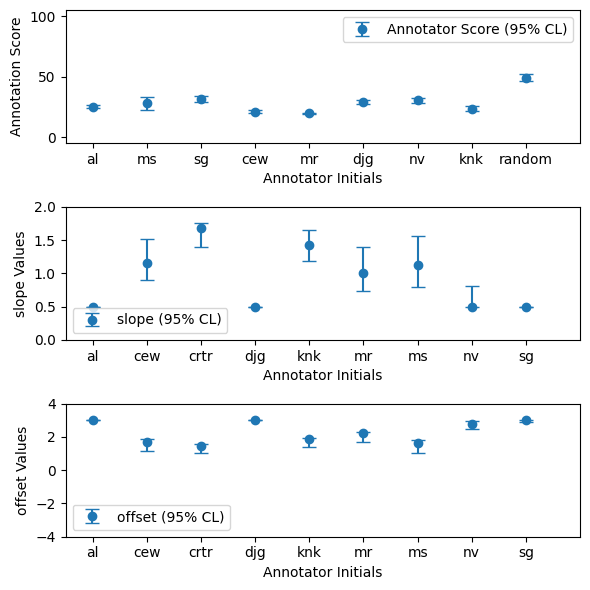

In [24]:
fig, axs = plt.subplots(3, 1, figsize=(6, 6))

annotators_all = []
means = []
stds = []

for resp in annotator_individual_data:
    data = np.array(annotator_individual_data[resp])

    res_mean = bootstrap_tools.bootstrap_wrap(data, np.mean, n_boot=1000, out_dim=0)
    annotators_all.append(resp)
    means.append(res_mean["result"])
    stds.append(
        [
            res_mean["result"] - res_mean["ci_lower"], 
            res_mean["ci_upper"] - res_mean["result"]
        ]
    )
# annotators.append("rnd")

axs[0].errorbar(
    annotators_all, 
    means, 
    yerr=np.array(stds).T, 
    fmt='o', 
    capsize=5, 
    label='Annotator Score (95% CL)',
)
axs[0].set_ylabel('Annotation Score')


annotators = hbt_scores_params.keys()
for lab_i, lab in enumerate(["slope", "offset"]):
    means = np.array([hbt_scores_params[ant]["bt_scores"][lab] for ant in annotators])
    lower = np.array([hbt_scores_params[ant]["ci_lower"][lab_i] for ant in annotators])
    upper = np.array([hbt_scores_params[ant]["ci_upper"][lab_i] for ant in annotators])

    axs[lab_i + 1].errorbar(
        annotators, 
        means, 
        yerr=(means - lower, upper - means), 
        fmt='o', 
        capsize=5, 
        label=f'{lab} (95% CL)',
    )
    axs[lab_i + 1].set_ylabel(f'{lab} Values')

y_bounds = [
    [-5., 105.],
    [0., 2.],
    [-4., 4.],
]
x_labs = [
    annotators_all,
    annotators,
    annotators,
]
for i in range(3):
    axs[i].set_xlabel('Annotator Initials')
    axs[i].set_xticks(range(len(x_labs[i])))
    axs[i].set_xticklabels(x_labs[i])
    axs[i].set_ylim(y_bounds[i])
    axs[i].set_xlim(-0.5, len(x_labs[i]))
    axs[i].legend()
plt.tight_layout()
plt.show()

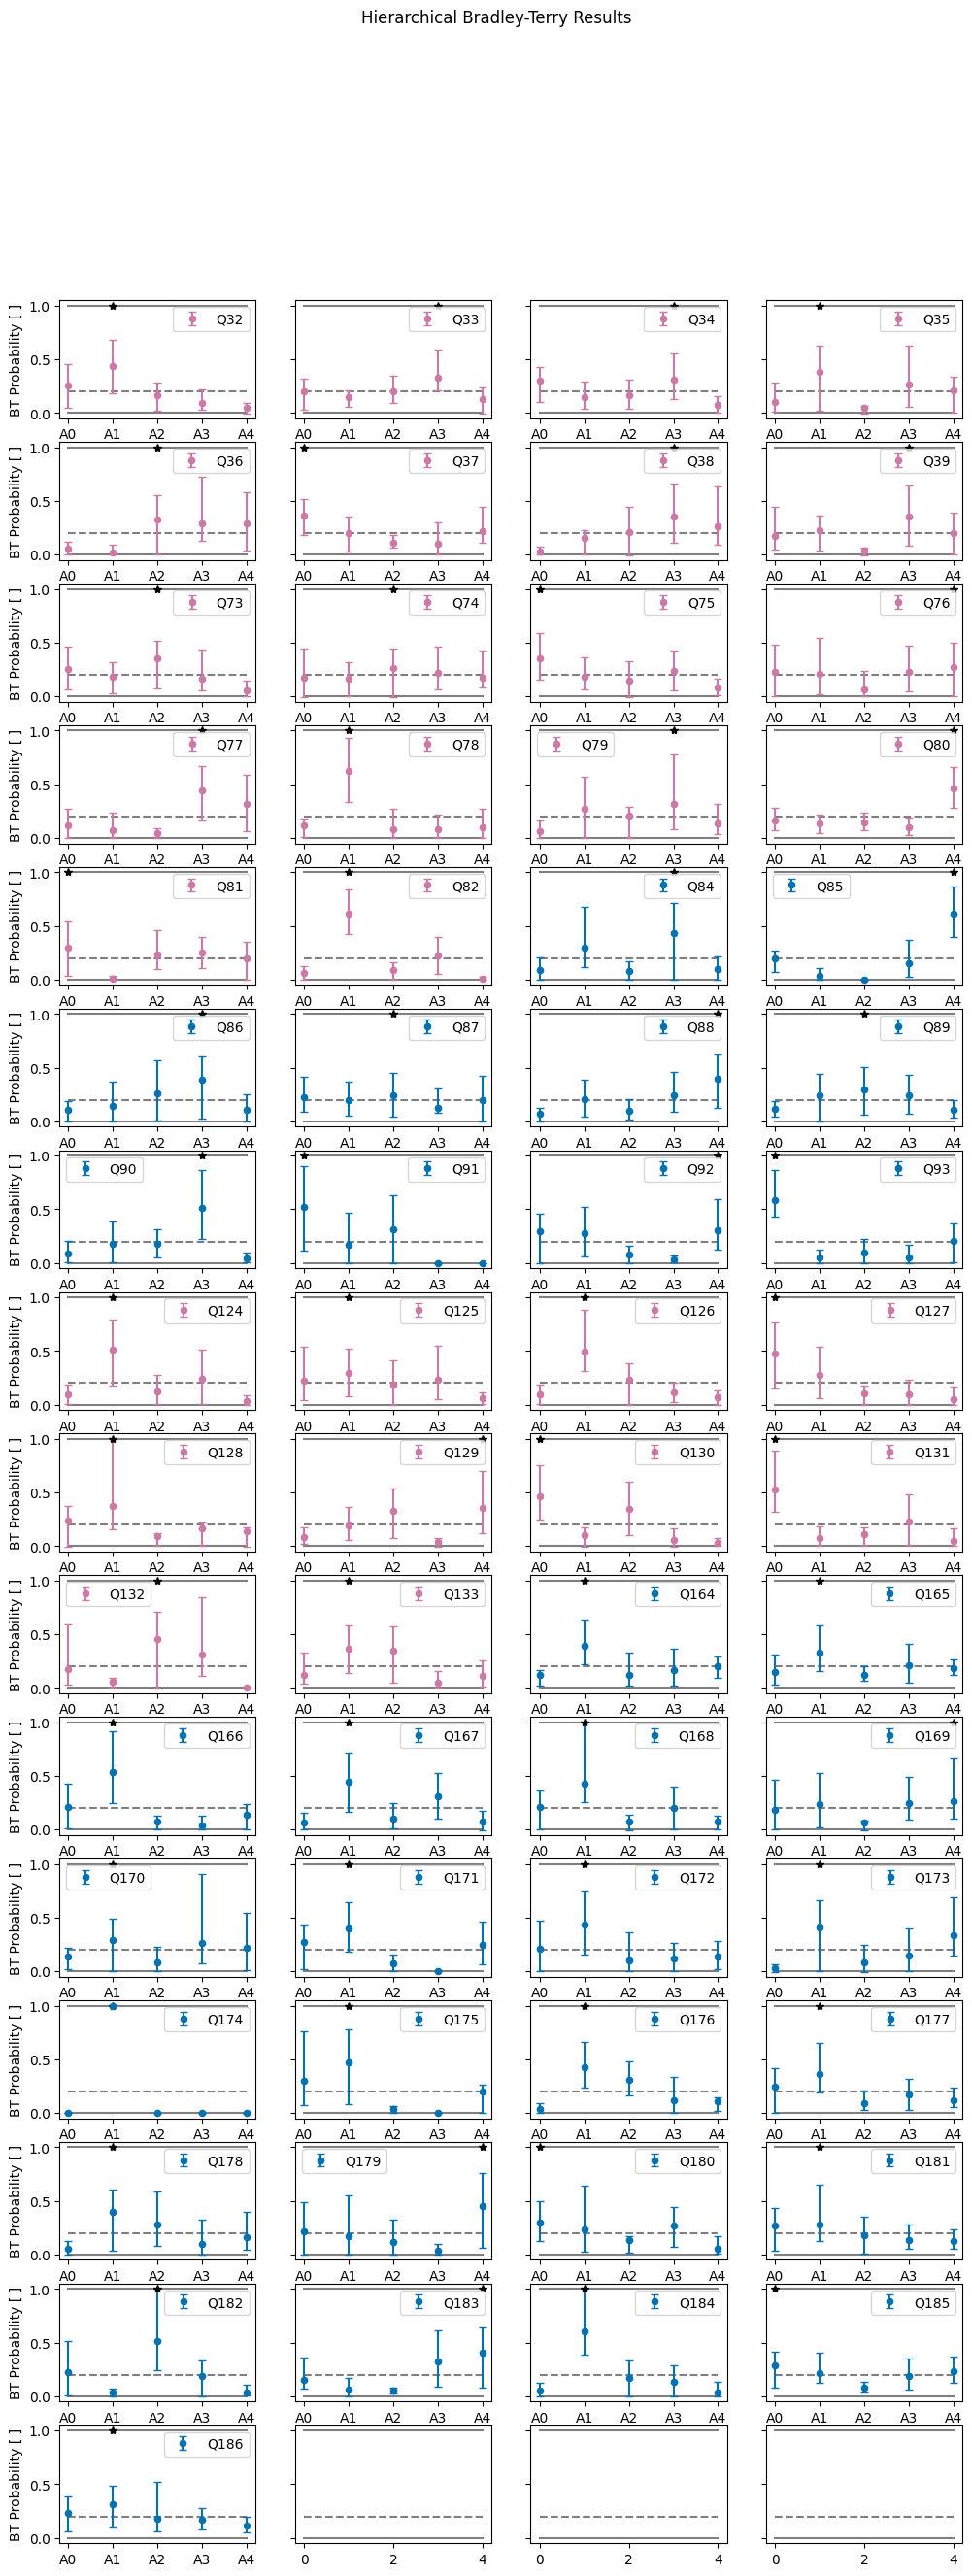

In [14]:
plot_results.plot_bt_scores(hbt_scores, "Hierarchical Bradley-Terry Results")

In [15]:
means_and_alphas = helper_functions.calc_mean_and_alphas(response_data, do_boot=True)
means_and_alphas[32]

{'res': array([42. , 49.9, 13.9, 15.3,  3.8]),
 'ci_lower': array([17.5  , 22.595,  0.9  ,  2.5  ,  0.2  ]),
 'ci_upper': array([67.5325, 77.5   , 33.9   , 33.5   ,  9.7   ]),
 'alpha': np.float64(0.14498488697650203),
 'ci_alpha_lower': np.float64(0.033868333205936636),
 'ci_alpha_upper': np.float64(0.5436239361321252)}

In [16]:
bt_scores = helper_functions.calc_preference_probs(response_data, do_boot=True)
bt_scores_typed = [
    helper_functions.calc_preference_probs(processed_data_typed[i], do_boot=True)
    for i in range(3)
]
bt_scores[32]

/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py:552: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)
/Users/max/Software/mentat/.venv/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py:317: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


`xtol` termination condition is satisfied.
Number of iterations: 28, function evaluations: 240, CG iterations: 58, optimality: 1.14e-06, constraint violation: 2.22e-16, execution time: 0.04 s.
`xtol` termination condition is satisfied.
Number of iterations: 32, function evaluations: 216, CG iterations: 57, optimality: 1.62e-06, constraint violation: 1.11e-16, execution time: 0.035 s.
`xtol` termination condition is satisfied.
Number of iterations: 27, function evaluations: 162, CG iterations: 58, optimality: 5.06e-07, constraint violation: 0.00e+00, execution time: 0.025 s.
`xtol` termination condition is satisfied.
Number of iterations: 30, function evaluations: 228, CG iterations: 49, optimality: 9.80e-07, constraint violation: 1.11e-16, execution time: 0.037 s.
`xtol` termination condition is satisfied.
Number of iterations: 29, function evaluations: 222, CG iterations: 54, optimality: 7.63e-07, constraint violation: 1.11e-16, execution time: 0.036 s.
`xtol` termination condition is

{'bt_scores': array([0.32564352, 0.29266022, 0.15578226, 0.15527926, 0.07063474]),
 'ci_lower': array([1.18006353e-01, 1.19651090e-01, 3.35751104e-02, 3.83019523e-02,
        2.64429827e-09]),
 'ci_upper': array([0.63101378, 0.54915564, 0.27131472, 0.32147809, 0.1366569 ])}

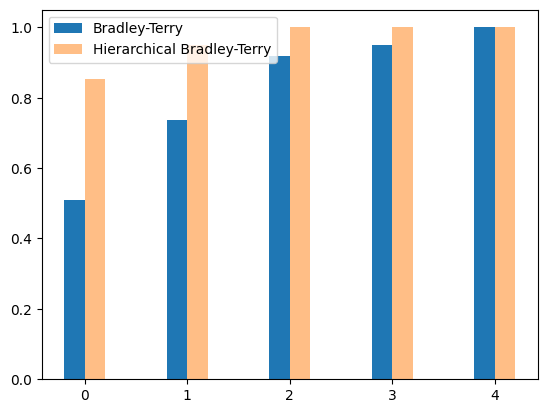

In [17]:
# How well does BT perform agaisnt HBT at recovering creator ground truth as top-k answer?
# Note: Creator label should be biased, too

resres = {
    "bt": np.zeros(5),
    "hbt": np.zeros(5),
}
for q_id in bt_scores.keys():
    q_id = int(q_id)
    bt_vals = bt_scores[q_id]['bt_scores']
    hbt_vals = hbt_scores[q_id]['bt_scores']
    ct_vals = question_dataset[question_dataset["q_id"] == q_id]["creator_truth"].item()

    n_dim = bt_vals.shape[0]
    for k in range(n_dim):
        bt_top_k = np.zeros(n_dim)
        hbt_top_k = np.zeros(n_dim)

        bt_top_k[np.argsort(bt_vals)[::-1][:k + 1]] = 1
        hbt_top_k[np.argsort(hbt_vals)[::-1][:k + 1]] = 1

        bt_success = np.sum(bt_top_k * ct_vals)
        hbt_success = np.sum(hbt_top_k * ct_vals)

        resres["bt"][k] += bt_success
        resres["hbt"][k] += hbt_success

plt.bar(np.array(range(5))-0.1, resres["bt"] / 61., width=0.2, label="Bradley-Terry")
plt.bar(np.array(range(5)) + 0.1, resres["hbt"] / 61., width=0.2, label="Hierarchical Bradley-Terry", alpha=0.5)
plt.legend()

In [18]:
diff_01 = helper_functions.calc_preference_probs_differences(
    bt_scores_typed[0], bt_scores_typed[1]
)

diff_02 = helper_functions.calc_preference_probs_differences(
    bt_scores_typed[0], bt_scores_typed[2]
)
diff_12 = helper_functions.calc_preference_probs_differences(
    bt_scores_typed[1], bt_scores_typed[2]
)

# 0.474 +0.053 -0.054
# 0.489 +0.057 -0.064
# 0.546 +0.056 -0.057


0.474 +0.050 -0.050
0.489 +0.057 -0.061
0.546 +0.058 -0.058


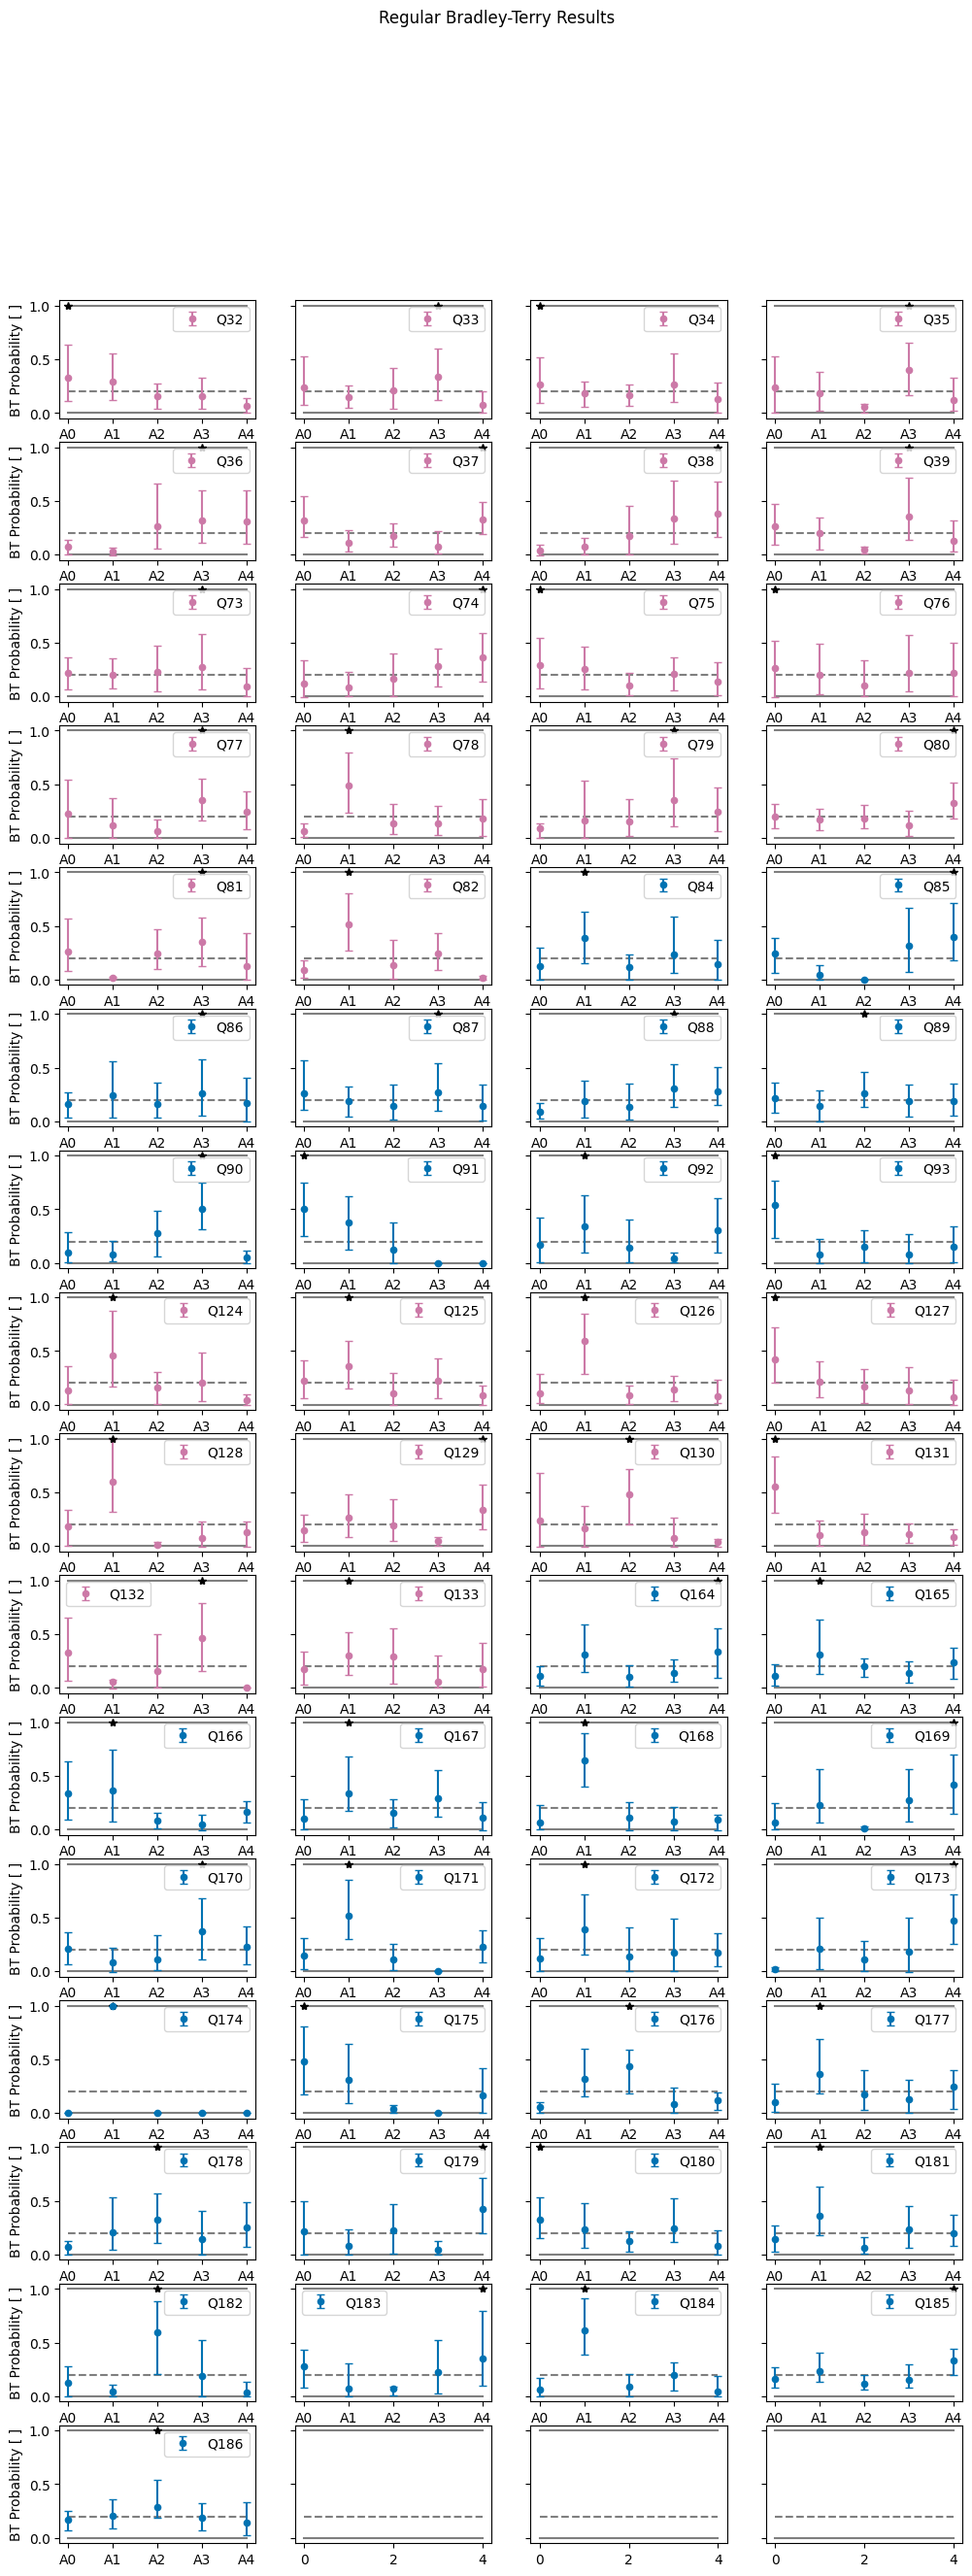

In [19]:
plot_results.plot_bt_scores(bt_scores, "Regular Bradley-Terry Results")

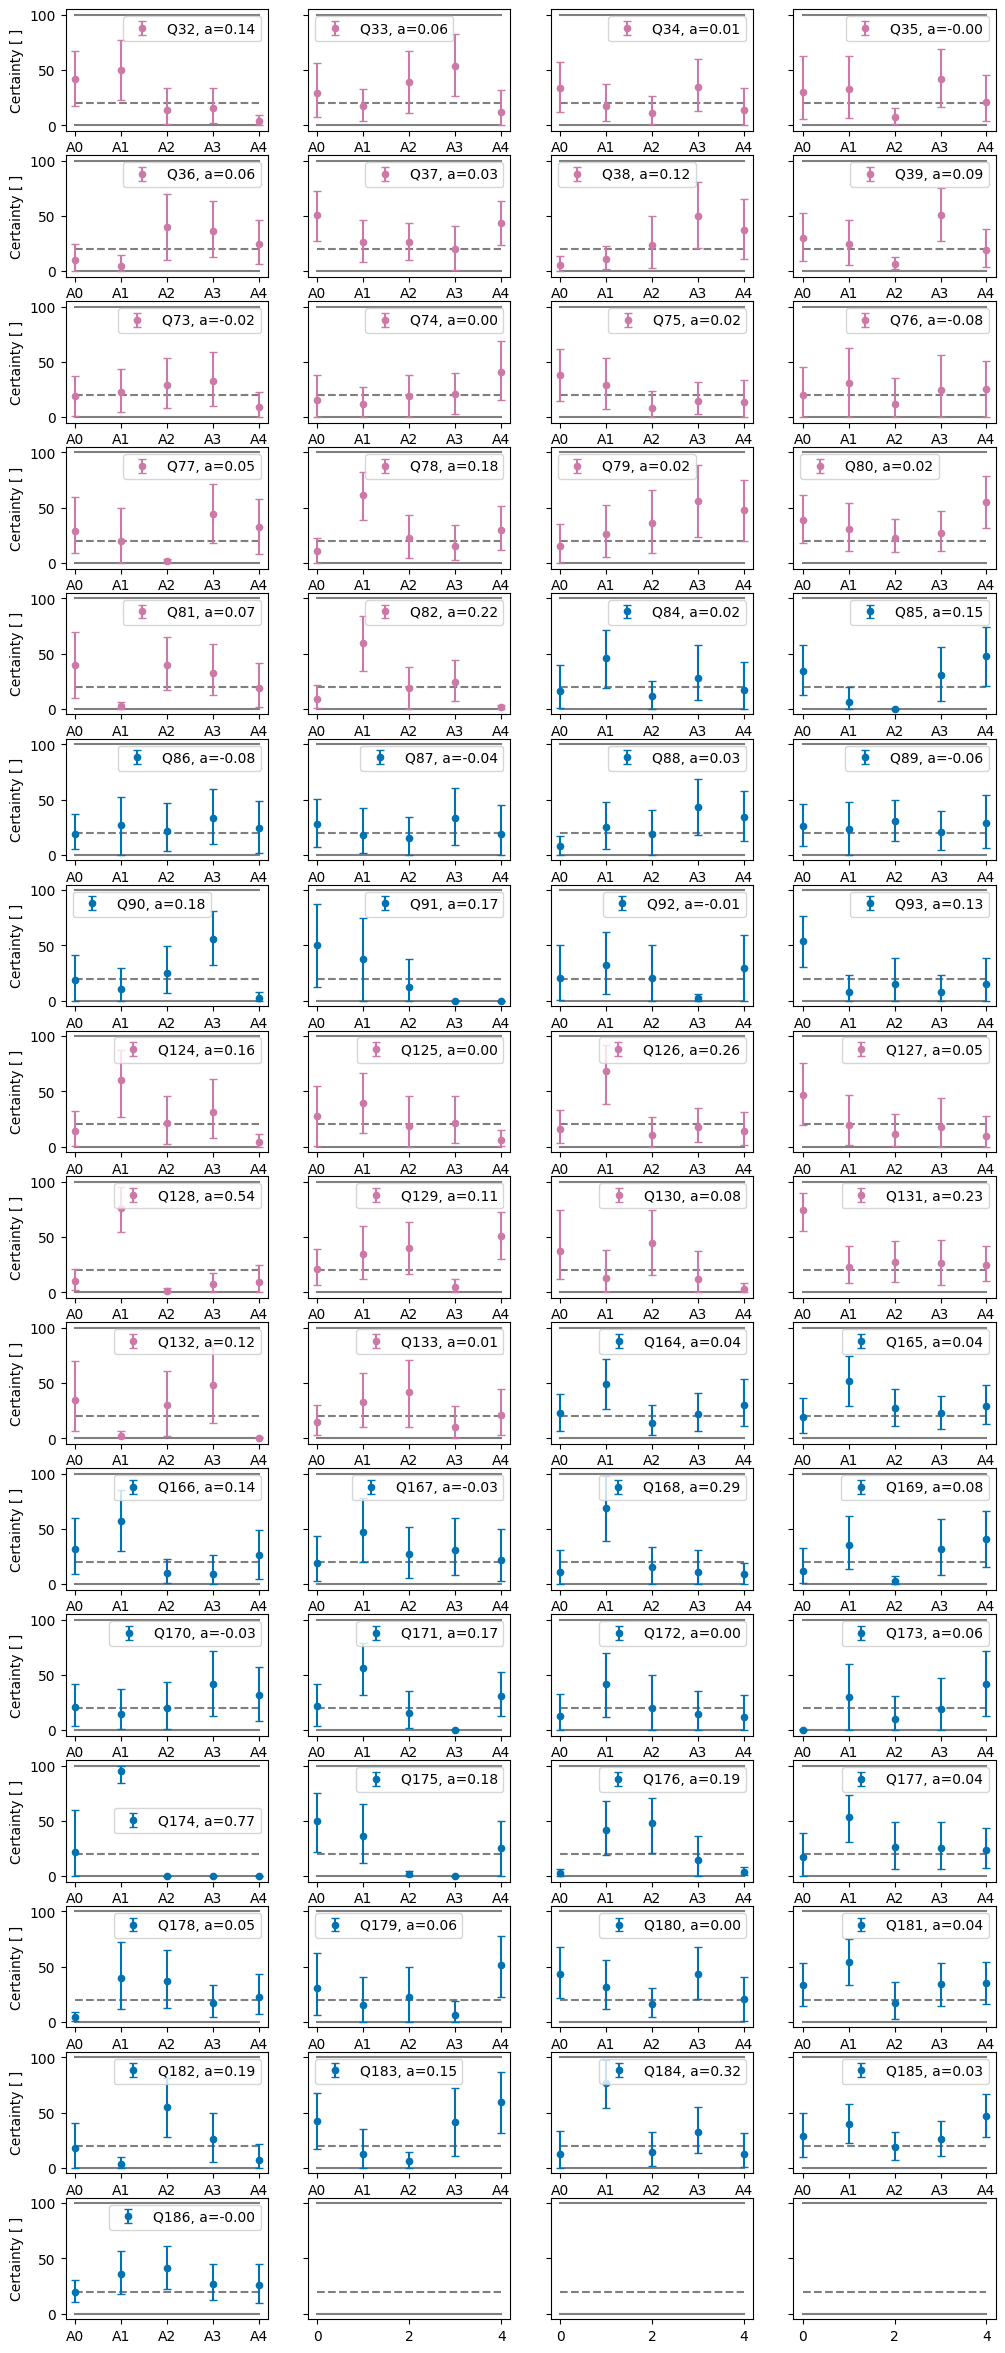

In [20]:
fig, axs = plt.subplots(16, 4, figsize=(12, 30))
for i in range(16): 
    for j in range(4):
        ax = axs[i, j]
        ax.set_ylim([-5., 105.])
        ax.plot([0., 4.], [0., 0.], c="k", alpha=0.5)
        ax.plot([0., 4.], [100., 100.], c="k", alpha=0.5)
        ax.plot([0., 4.], [20., 20.], c="k", ls="dashed", alpha=0.5)
        if j == 0:
            ax.set_ylabel("Certainty [ ]")
        else:
            ax.set_ylabel("")
            ax.set_yticklabels([])

pos_counter = 0
c_counter = 0
r_counter = 0
alpha_tri = []
alpha_doc = []
for q_id in means_and_alphas:
    
    res_mean = means_and_alphas[q_id]["res"]
    ci_lower = means_and_alphas[q_id]["ci_lower"]
    ci_upper = means_and_alphas[q_id]["ci_upper"]
    res_alpha = means_and_alphas[q_id]["alpha"]
    ci_alpha_lower = means_and_alphas[q_id]["ci_alpha_lower"]
    ci_alpha_upper = means_and_alphas[q_id]["ci_alpha_upper"]

    if q_id in inds_triage:
        c = cols["triage"]
        alpha_tri.append(res_alpha)
    elif q_id in inds_documentation:
        c = cols["documentation"]
        alpha_doc.append(res_alpha)            
    else:
        c = cols["other"]
    
    axs[c_counter, r_counter].errorbar(
        ["A0", "A1", "A2", "A3", "A4"],
        res_mean,
        yerr=(res_mean - ci_lower, ci_upper - res_mean),
        fmt=".",
        label=f"Q{int(q_id)}, a={res_alpha:0.2f}",
        ms=9,
        capsize=3,
        c=c,
    )
    axs[c_counter, r_counter].legend()
    
    pos_counter += 1
    r_counter += 1
    if pos_counter % 4 == 0 and pos_counter > 0:
        c_counter += 1
        r_counter = 0
        
# plt.savefig("annotation_results.pdf") 

Triage 
Mean: 0.09, Number of Q alpha<0: 3 / 28
Documentation 
Mean: 0.10, Number of Q alpha<0: 7 / 33


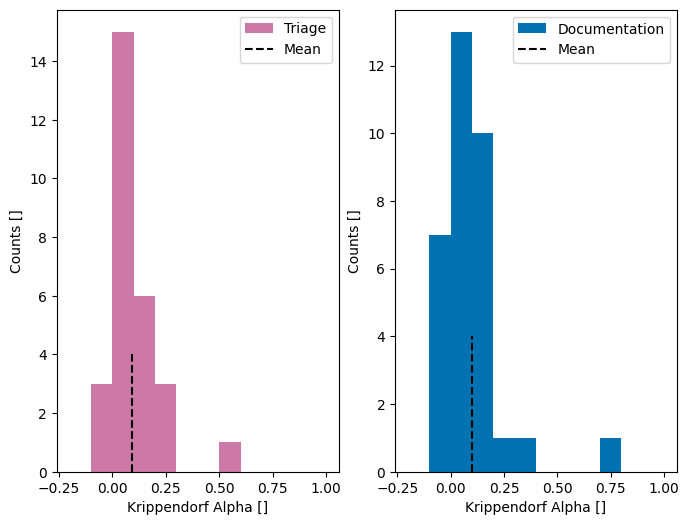

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(8, 6))

axs[0].hist(alpha_tri, range=(-0.2, 1.), bins=12, label=f"Triage", color=cols["triage"])
axs[0].vlines(np.mean(alpha_tri), 0., 4., colors='k', linestyles='dashed', label="Mean")
axs[1].hist(alpha_doc, range=(-0.2, 1.), bins=12, label=f"Documentation", color=cols["documentation"])
axs[1].vlines(np.mean(alpha_doc), 0., 4., colors='k', linestyles='dashed', label="Mean")
for i in [0, 1]:
    axs[i].legend()
    axs[i].set_xlabel("Krippendorf Alpha []")
    axs[i].set_ylabel("Counts []")
print(f"Triage \nMean: {np.mean(alpha_tri):0.2f}, Number of Q alpha<0: {sum(np.array(alpha_tri) < 0.0)} / {len(alpha_tri)}")
print(f"Documentation \nMean: {np.mean(alpha_doc):0.2f}, Number of Q alpha<0: {sum(np.array(alpha_doc) < 0.0)} / {len(alpha_doc)}")

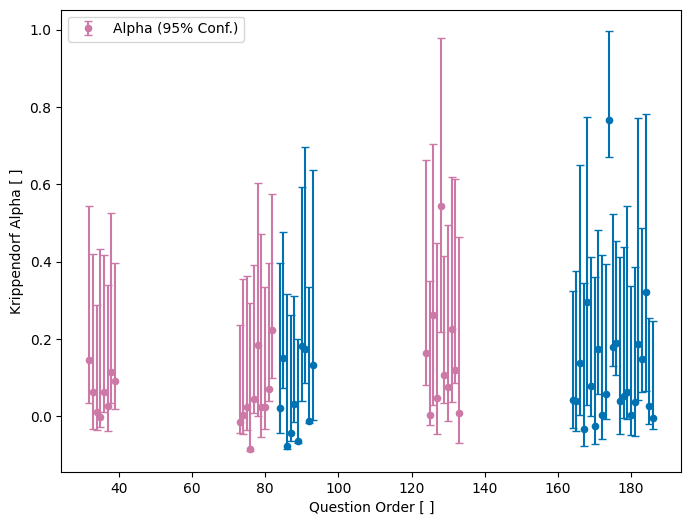

In [22]:
fig, axs = plt.subplots(1, 1, figsize=(8, 6))

plot_alphas = {"q_id": [], "a": [], "a+-": [], "c": []}
for q_id in means_and_alphas:
    a = means_and_alphas[q_id]["alpha"]
    plot_alphas["q_id"].append(q_id)
    plot_alphas["a"].append(a)
    plot_alphas["a+-"].append(
        [
            a - means_and_alphas[q_id]["ci_alpha_lower"], 
            means_and_alphas[q_id]["ci_alpha_upper"] - a
        ]
    )
    if q_id in inds_triage:
        c = cols["triage"]
    elif q_id in inds_documentation:
        c = cols["documentation"]
    else:
        c = cols["other"]
    plot_alphas["c"].append(c)

# Iterate due to issue with colors
for i in range(len(plot_alphas["a"])):
    if i == 0:
        lab = "Alpha (95% Conf.)"
    else:
        lab = None
    axs.errorbar(
        plot_alphas["q_id"][i],
        plot_alphas["a"][i],
        yerr=np.array(np.abs(plot_alphas["a+-"]))[i].reshape(2, 1),
        fmt=".",
        ms=9,
        capsize=3,
        c=plot_alphas["c"][i],
        label=lab,
    )


# axs.errorbar(
#     plot_alphas["q_id"],
#     np.array(plot_alphas["a"]),
#     yerr=np.array(np.abs(plot_alphas["a+-"])).T,
#     fmt=".",
#     ms=9,
#     capsize=3,
#     c=np.array(plot_alphas["c"]),
#     label="Alpha (95% Conf.)",
# )
axs.set_xlabel("Question Order [ ]")
axs.set_ylabel("Krippendorf Alpha [ ]")
axs.legend()
# axs.set_xticklabels([str(q) for q in alpha_plot["q"]])

In [ ]:
"""
## Potentially Unusable:
cew 38.0 needs outpatient mental health and substance use resources q_male
cew 38.0 Patient has a history of schizophrenia and methamphetamine use disorder. She got better with an antipsychotic (we don't know what dose, which is relevant for clinical decision making) and would likely be discharged with substance use resources, but also needs outpatient psychiatry resources. There is no mention of collateral or previous presentations which would also be important to know about in this case.  q_female

cew 74.0 We need the age of this patient to be able to answer this question.  q_they

175 (all answers the same, except one that states "This is the right answer")

## Fixable?
cew 33.0 recommend changing question to "What would be the first step for most psychiatrists triaging this situation?" Asking patient about voluntary admission would be first, safety planning would be second but is ideally part of this conversation.  q_they

al 164.0  "If yes, when was it and what was the reason for admission? Yes, when I was 18 years old", not sure this is missing a part? q_male

cew 174.0 it is not clear that that patient is actually taking sertraline now in the vignette- he took sertraline for three months but it's not clear when.  q_male

cew 181.0 Probably should put "suspected" in utero cocaine exposure in answer.  q_female

## Remove one annotation due to uncertainty?

djg 86.0 My lack of confidence is due to the fact that I'm a resident (not an attending) and don't normally do billing. q_male

""";

In [ ]:
"""
For each question:
1) Calculate preference score (all answers are independent)
2) Add a measure for disagreement (feature, not a bug), e.g., something variance based + look for outliers
""";